### Import libraries

In [10]:
import requests
import bs4

### Getting HTML information from http://quotes.toscrape.com/

In [29]:
res = requests.get("http://quotes.toscrape.com/")

In [30]:
soup = bs4.BeautifulSoup(res.text,'lxml')

In [6]:
# Checking HTML 
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Quotes to Scrape</title>
<link href="/static/bootstrap.min.css" rel="stylesheet"/>
<link href="/static/main.css" rel="stylesheet"/>
</head>
<body>
<div class="container">
<div class="row header-box">
<div class="col-md-8">
<h1>
<a href="/" style="text-decoration: none">Quotes to Scrape</a>
</h1>
</div>
<div class="col-md-4">
<p>
<a href="/login">Login</a>
</p>
</div>
</div>
<div class="row">
<div class="col-md-8">
<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="t

### Getting names of all the authors on the first page

In [9]:
soup.select('.author')[0].text

'Albert Einstein'

In [10]:
authors = set()

for name in soup.select('.author'):
    authors.add(name.text)

In [11]:
authors

{'Albert Einstein',
 'André Gide',
 'Eleanor Roosevelt',
 'J.K. Rowling',
 'Jane Austen',
 'Marilyn Monroe',
 'Steve Martin',
 'Thomas A. Edison'}

In [1]:
# getting an image of a page
from PIL import Image

In [2]:
firstPage = Image.open('Screen Shot 2021-04-21 at 1.25.36 PM.png')

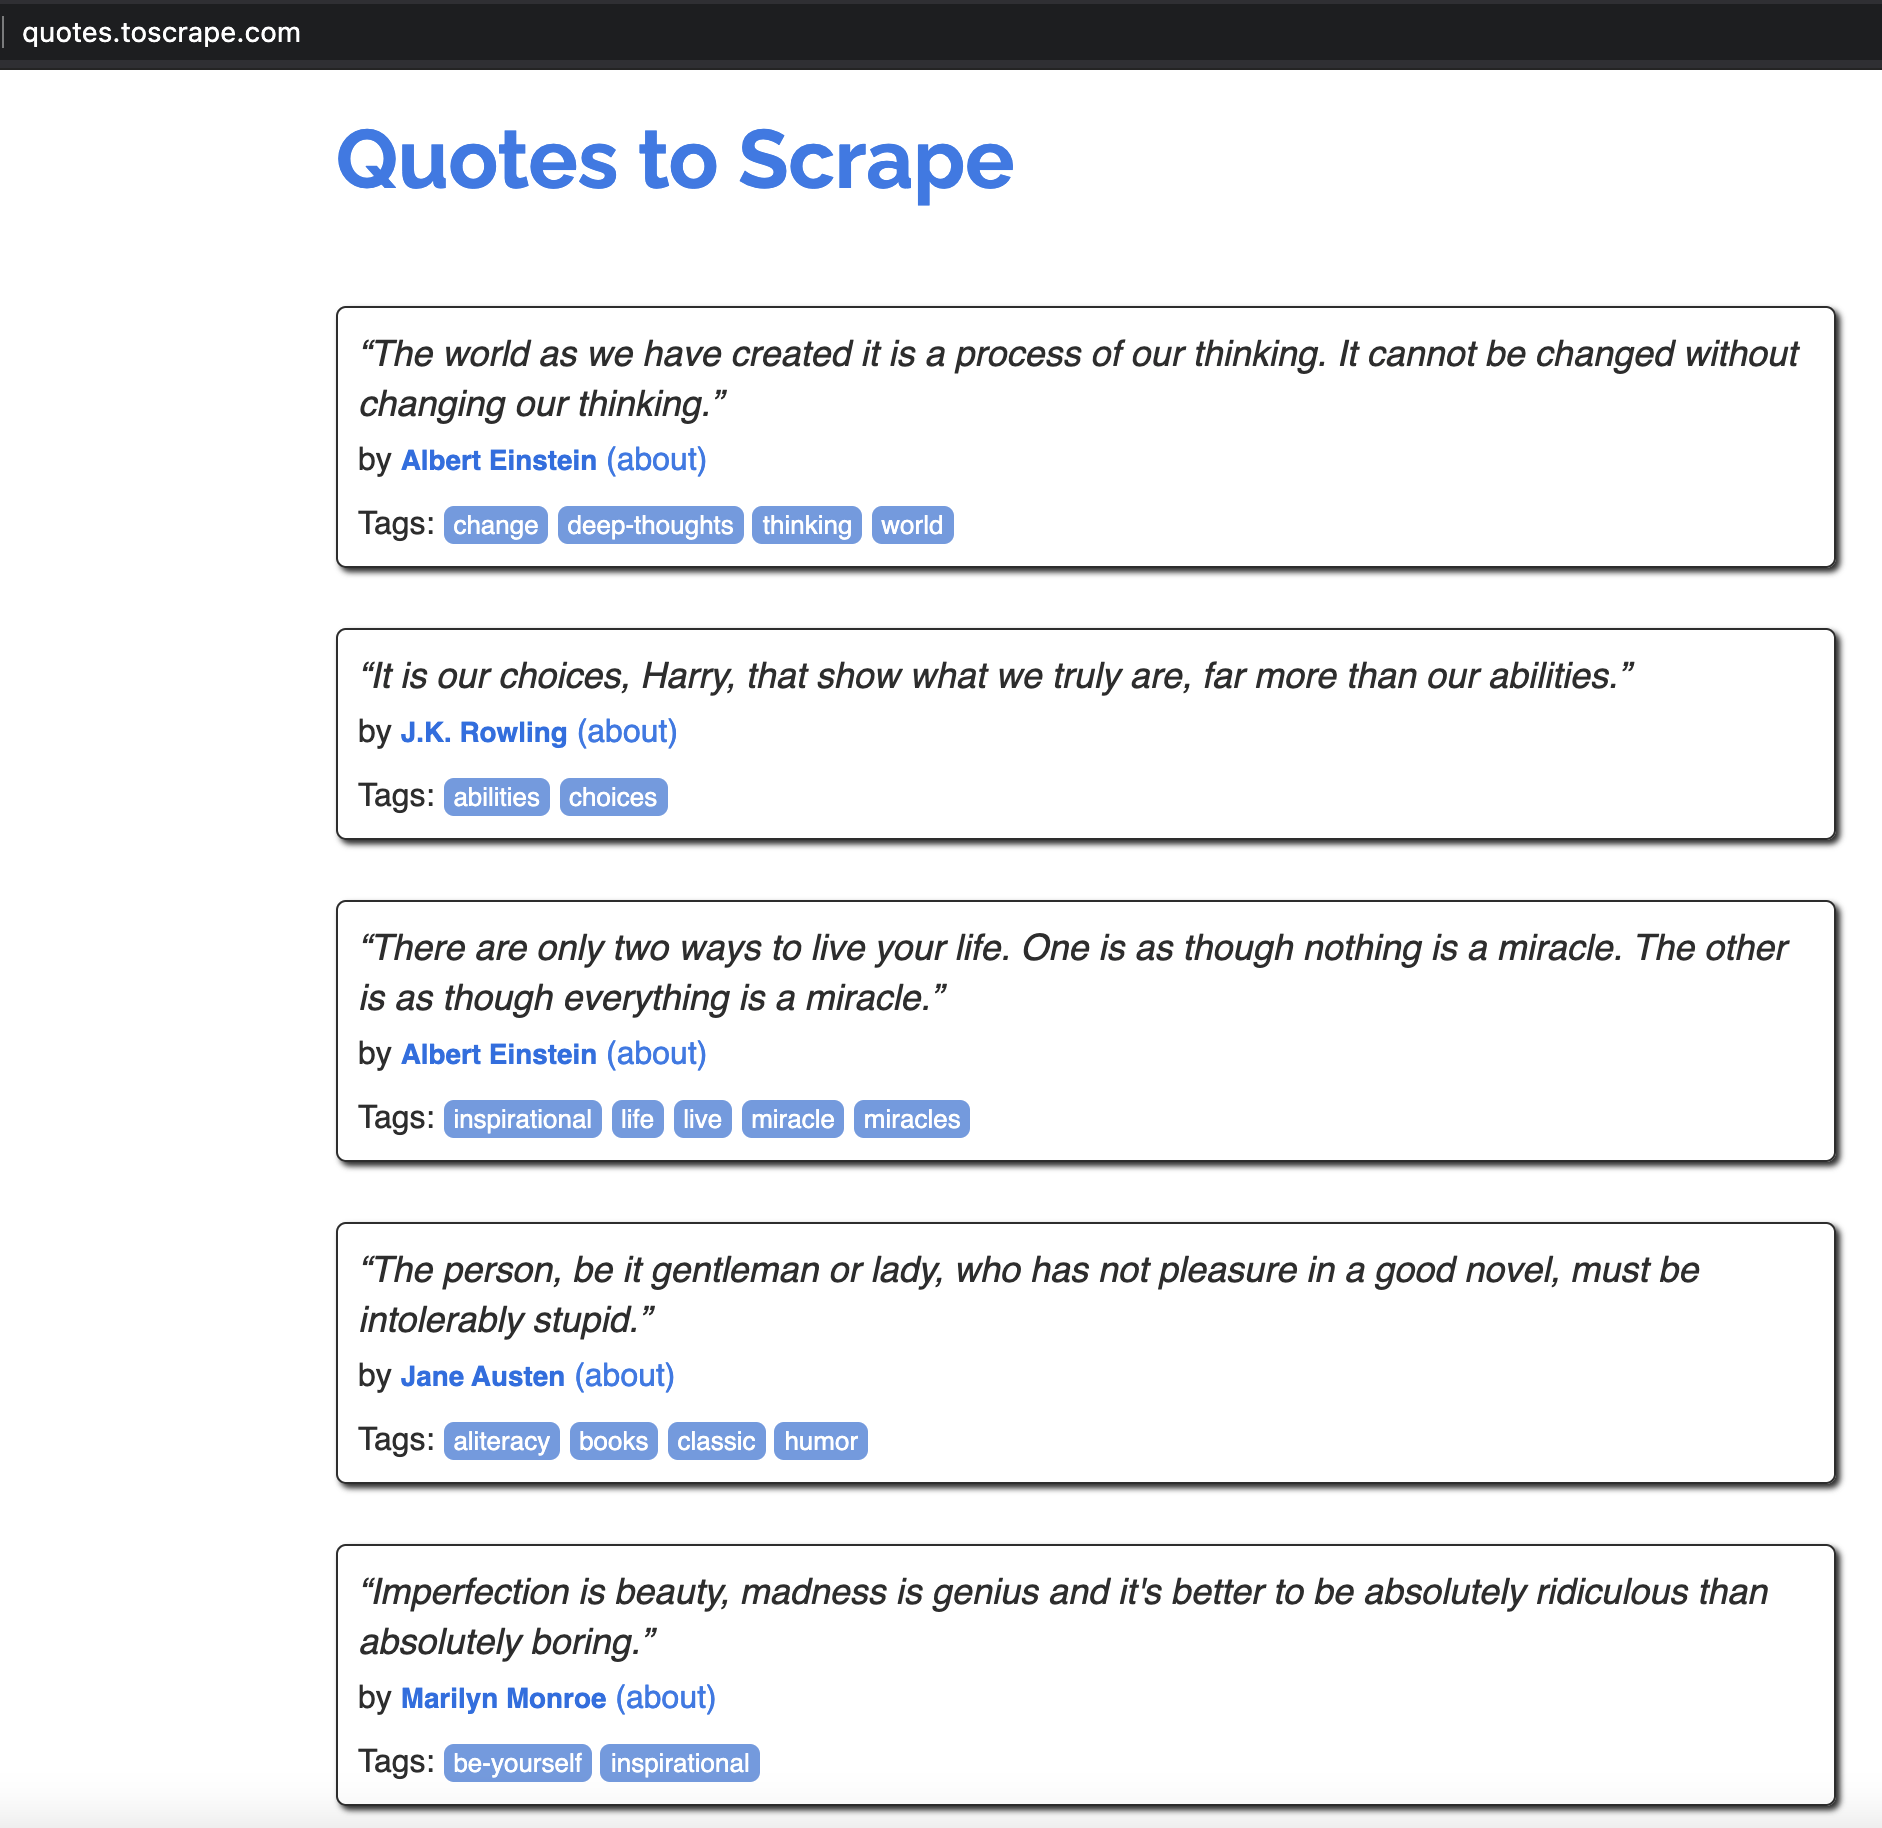

In [4]:
firstPage

### Getting a list of all the quotes on the first page

In [12]:
soup.select('.text')[0]

<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>

In [13]:
quoteList = []

for quote in soup.select('.text'):
    quoteList.append(quote.text)

In [14]:
quoteList

['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”',
 '“It is our choices, Harry, that show what we truly are, far more than our abilities.”',
 '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”',
 '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”',
 "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”",
 '“Try not to become a man of success. Rather become a man of value.”',
 '“It is better to be hated for what you are than to be loved for what you are not.”',
 "“I have not failed. I've just found 10,000 ways that won't work.”",
 "“A woman is like a tea bag; you never know how strong it is until it's in hot water.”",
 '“A day without sunshine is like, you know, night.”']

### extracting the top ten tags from the requests text shown on the top right from the home page

In [17]:
#checking html elements
soup.select('.tag-item')[0].text

'\nlove\n'

In [18]:
len(soup.select('.tag-item'))

10

In [23]:
for item in soup.select('.tag-item'):
    print(item.text)


love


inspirational


life


humor


books


reading


friendship


friends


truth


simile



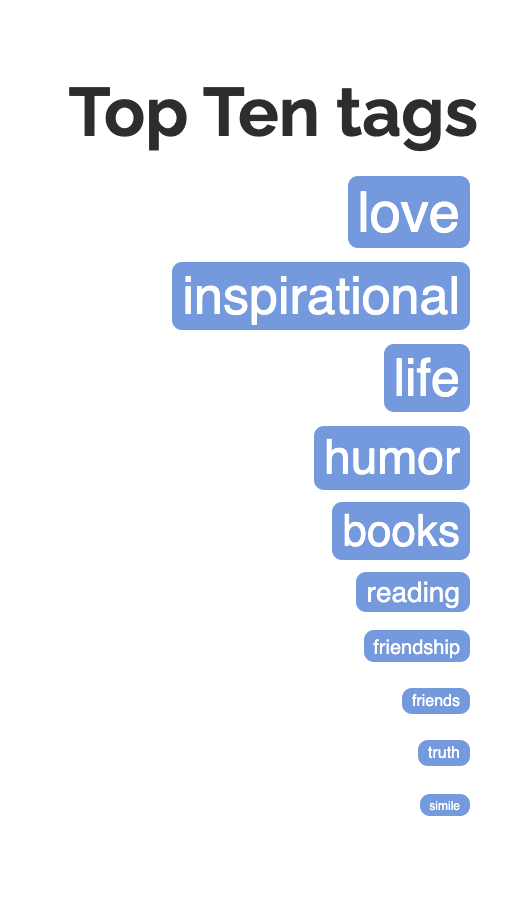

In [25]:
Image.open('Screen Shot 2021-04-21 at 2.06.17 PM.png')

### Getting a list of auother from all the pages (http://quotes.toscrape.com/)

In [12]:
# assigning initial values 
page = 1
    
authors = set()
    
myurl = f"https://quotes.toscrape.com/page/{page}/"
    
res = requests.get(myurl)
    
    # loop thourgh the pages until there is no quotes
while "No quotes found!" not in res.text:
        
    myurl = f"https://quotes.toscrape.com/page/{page}/"
        
    res = requests.get(myurl) 
    
    soup = bs4.BeautifulSoup(res.text, 'lxml')
        
    # loop thourgh the page
    for name in soup.select('.author'):
        authors.add(name.text)
        
    page = page+1
            
authors

{'Albert Einstein',
 'Alexandre Dumas fils',
 'Alfred Tennyson',
 'Allen Saunders',
 'André Gide',
 'Ayn Rand',
 'Bob Marley',
 'C.S. Lewis',
 'Charles Bukowski',
 'Charles M. Schulz',
 'Douglas Adams',
 'Dr. Seuss',
 'E.E. Cummings',
 'Eleanor Roosevelt',
 'Elie Wiesel',
 'Ernest Hemingway',
 'Friedrich Nietzsche',
 'Garrison Keillor',
 'George Bernard Shaw',
 'George Carlin',
 'George Eliot',
 'George R.R. Martin',
 'Harper Lee',
 'Haruki Murakami',
 'Helen Keller',
 'J.D. Salinger',
 'J.K. Rowling',
 'J.M. Barrie',
 'J.R.R. Tolkien',
 'James Baldwin',
 'Jane Austen',
 'Jim Henson',
 'Jimi Hendrix',
 'John Lennon',
 'Jorge Luis Borges',
 'Khaled Hosseini',
 "Madeleine L'Engle",
 'Marilyn Monroe',
 'Mark Twain',
 'Martin Luther King Jr.',
 'Mother Teresa',
 'Pablo Neruda',
 'Ralph Waldo Emerson',
 'Stephenie Meyer',
 'Steve Martin',
 'Suzanne Collins',
 'Terry Pratchett',
 'Thomas A. Edison',
 'W.C. Fields',
 'William Nicholson'}